In [1]:
import copy
import numpy as np

from numpy.random import shuffle
from numba import njit
import matplotlib.pyplot as plt

from time import time
from tqdm import tqdm

import funcs as f
import utils as utl

---

## Input

Input size:  (64, 64)
dtype: uint8 | max: 224 | min: 36


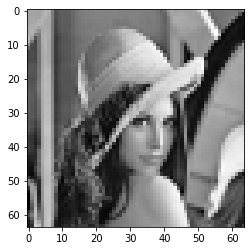

In [2]:
C = np.array([0, 64, 110, 160, 230])
binary_penalty = 70
repeats = 5
shape = (64,64)
img = utl.import_img("input.png", bw=True, newshape=shape)

In [3]:
np.max(img)

224

---

## Initial labeling and a_i

In [4]:
start = time()

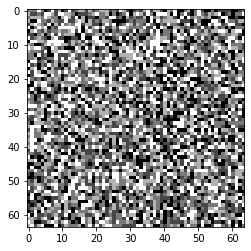

In [5]:
k_init = f.initial_labeling_random(img, C)
plt.imshow(np.reshape(k_init, shape), cmap='gray')

In [6]:
for _ in tqdm(range(repeats)):
    
    # a_i
    a_shuffle = np.copy(C)
    shuffle(a_shuffle)
    
    for i in range(C.size):
        a_i = a_shuffle[i]

        g = f.init_g(img, k_init, a_i, binary_penalty)

        res = f.Ford_Falkerson(img, g)
        labeling = f.translate_to_labeling(res, k_init, a_i)
        k_init = labeling

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.02s/it]


Time: 21.03232979774475


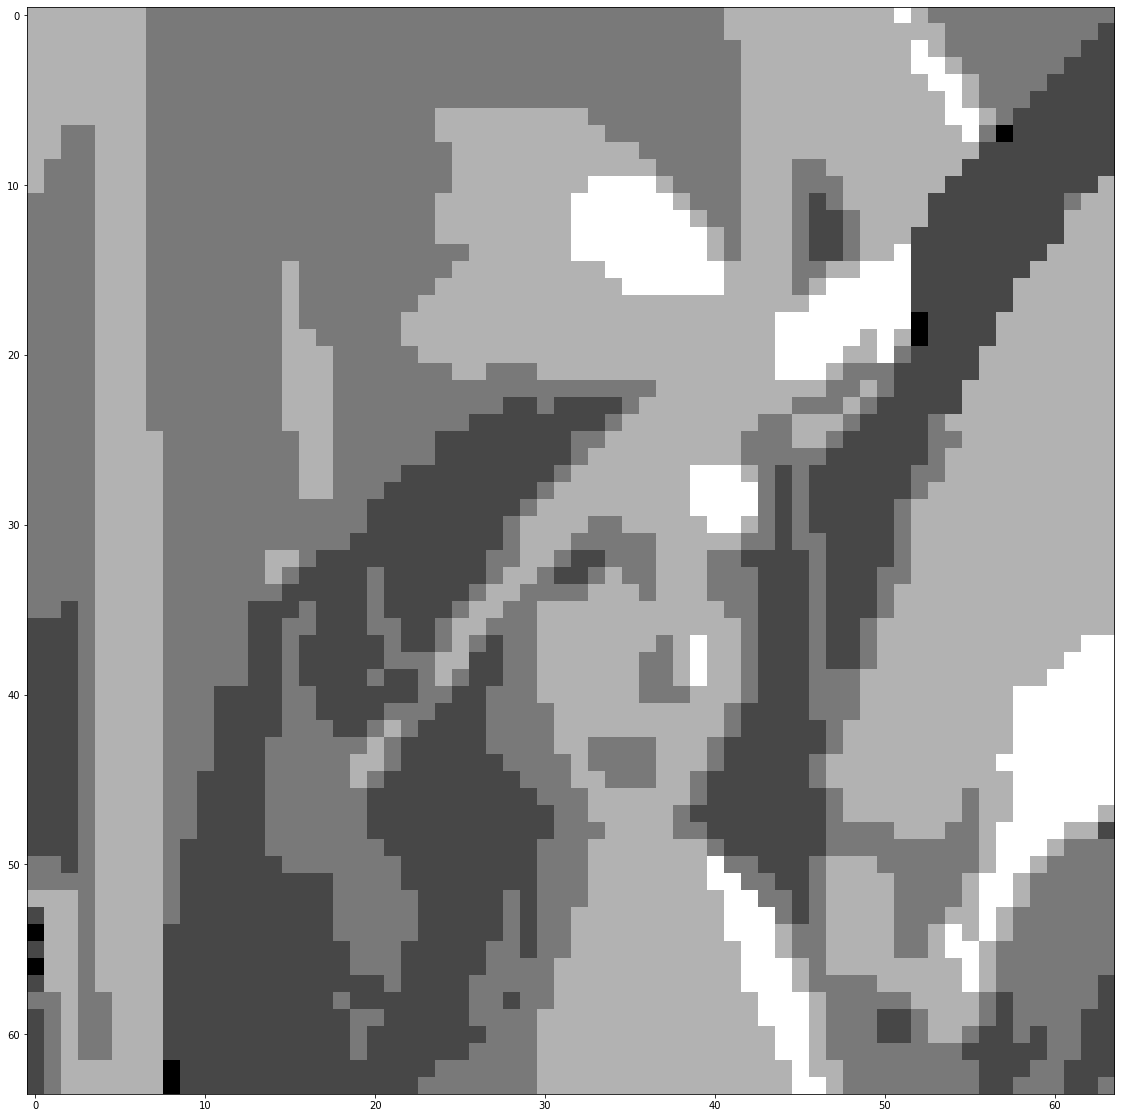

In [7]:
plt.subplots(figsize=(20, 20))
plt.imshow(np.reshape(labeling, shape[::-1]), cmap='gray')
print(f"Time: {time() - start}")

---